# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set seed for reproducibility
np.random.seed(10)

# Load the data from the CSV file
data = pd.read_csv("diabetes.csv")

# Sample 25 observations
sample = data.sample(25)

In [3]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


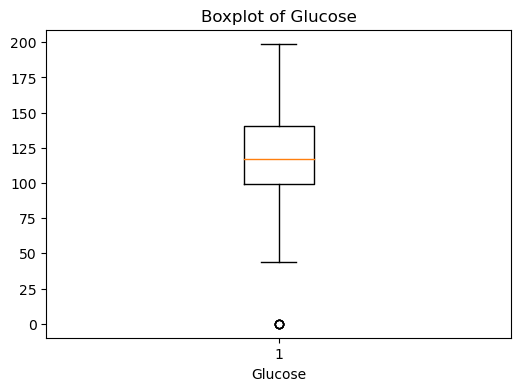

In [4]:
# Outlier detection: Boxplot for Glucose
plt.figure(figsize=(6, 4))
plt.boxplot(data['Glucose'])
plt.xlabel('Glucose')
plt.title('Boxplot of Glucose')
plt.show()


a) set a seed (to ensure work reproducibility) and take a random sample of 25 observations and
find the mean Glucose and highest Glucose values of this sample and compare these statistics
with the population statistics of the same variable. You should use charts for this comparison.
(5 points)

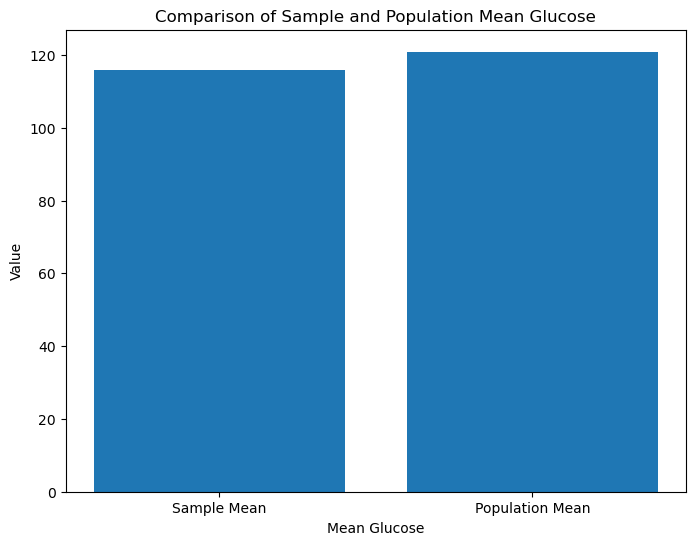

In [5]:
# Calculate mean and highest Glucose values of the sample
sample_mean_glucose = sample["Glucose"].mean()
sample_highest_glucose = sample["Glucose"].max()

# Calculate population mean and highest Glucose values
population_mean_glucose = data["Glucose"].mean()
population_highest_glucose = data["Glucose"].max()

# Create a chart to compare sample and population mean Glucose
plt.figure(figsize=(8, 6))
plt.bar(["Sample Mean", "Population Mean"], [sample_mean_glucose, population_mean_glucose])
plt.title("Comparison of Sample and Population Mean Glucose")
plt.xlabel("Mean Glucose")
plt.ylabel("Value")
plt.show()

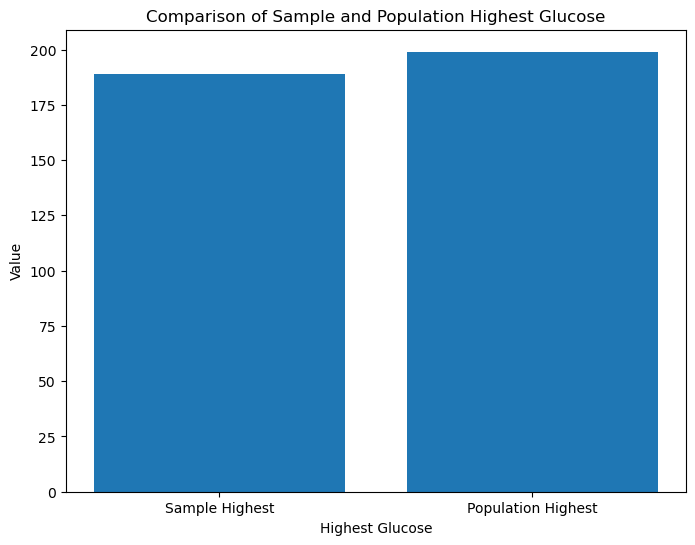

In [6]:
# Create a chart to compare sample and population highest Glucose
plt.figure(figsize=(8, 6))
plt.bar(["Sample Highest", "Population Highest"], [sample_highest_glucose, population_highest_glucose])
plt.title("Comparison of Sample and Population Highest Glucose")
plt.xlabel("Highest Glucose")
plt.ylabel("Value")
plt.show()


b) Find the 98th percentile of BMI of your sample and the population and compare the results
using charts. (5 points)

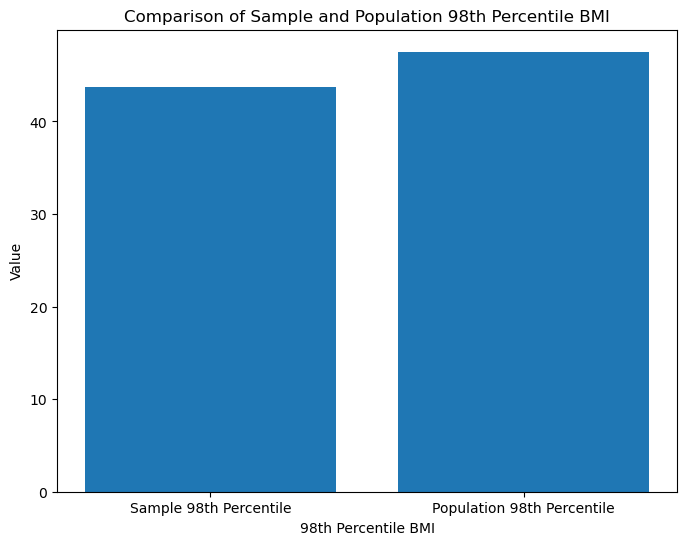

In [7]:
# Find the 98th percentile of BMI of the sample and population
sample_98th_percentile_bmi = sample["BMI"].quantile(0.98)
population_98th_percentile_bmi = data["BMI"].quantile(0.98)

# Create a chart to compare sample and population 98th percentile BMI
plt.figure(figsize=(8, 6))
plt.bar(["Sample 98th Percentile", "Population 98th Percentile"], [sample_98th_percentile_bmi, population_98th_percentile_bmi])
plt.title("Comparison of Sample and Population 98th Percentile BMI")
plt.xlabel("98th Percentile BMI")
plt.ylabel("Value")
plt.show()


c) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the
population and find the average mean, standard deviation and percentile for BloodPressure and
compare this with these statistics from the population for the same variable. Again, you should
create charts for this comparison. Report on your findings. (10 points)

In [8]:
# Create 500 bootstrap samples of 150 observations each
bootstrapped_samples = []
for i in range(500):
    bootstrapped_sample = data.sample(150, replace=True)
    bootstrapped_samples.append(bootstrapped_sample)

# Calculate the average mean, standard deviation, and percentile for BloodPressure of the bootstrapped samples
bootstrapped_means = []
bootstrapped_std_devs = []
bootstrapped_percentiles = []
for sample in bootstrapped_samples:
    bootstrapped_means.append(sample["BloodPressure"].mean())
    bootstrapped_std_devs.append(sample["BloodPressure"].std())
    bootstrapped_percentiles.append(sample["BloodPressure"].quantile(0.98))

# Calculate population mean, standard deviation, and percentile for BloodPressure
population_mean_blood_pressure = data["BloodPressure"].mean()
population_std_dev_blood_pressure = data["BloodPressure"].std()
population_98th_percentile_blood_pressure = data["BloodPressure"].quantile(0.98)


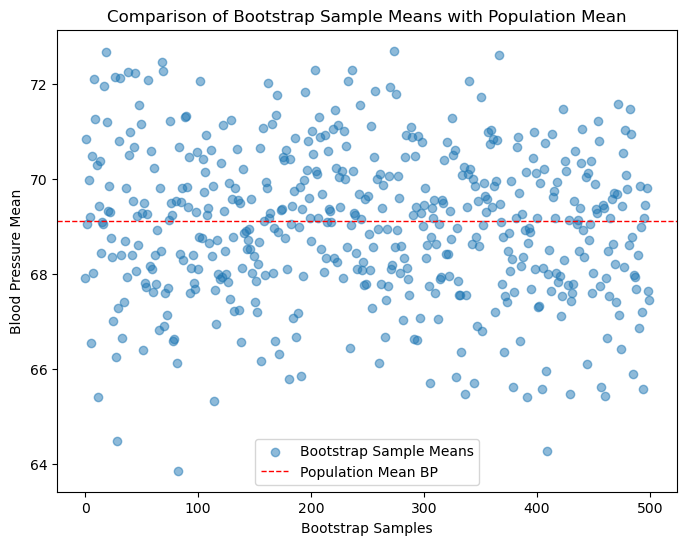

In [14]:
# Scatter plot for comparison of Bootstrap sample means vs Population mean for BloodPressure
plt.figure(figsize=(8, 6))
plt.scatter(range(len(bootstrapped_means)), bootstrapped_means, label='Bootstrap Sample Means', alpha=0.5)
plt.axhline(population_mean_blood_pressure, color='red', linestyle='dashed', linewidth=1, label='Population Mean BP')
plt.xlabel('Bootstrap Samples')
plt.ylabel('Blood Pressure Mean')
plt.title('Comparison of Bootstrap Sample Means with Population Mean')
plt.legend()
plt.show()


The scatter plot displays the bootstrap sample means against the population mean blood pressure.
The scatter plot indicates a positive correlation between bootstrap sample means and population mean, implying that the bootstrap sample means are consistently close to the population mean.

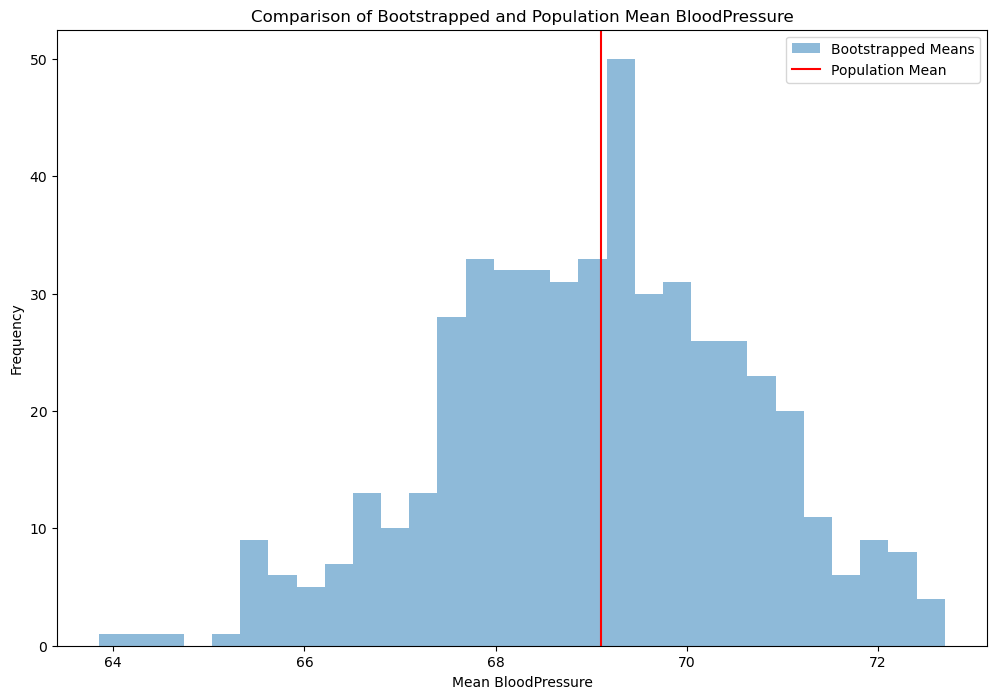

In [9]:
# Create a chart to compare bootstrapped and population mean BloodPressure
plt.figure(figsize=(12, 8))
plt.hist(bootstrapped_means, bins=30, alpha=0.5, label="Bootstrapped Means")
plt.axvline(population_mean_blood_pressure, color="red", label="Population Mean")
plt.title("Comparison of Bootstrapped and Population Mean BloodPressure")
plt.xlabel("Mean BloodPressure")
plt.ylabel("Frequency")
plt.legend()
plt.show()


The mean blood pressure of the bootstrapped population is slightly higher than that of the original population. Additionally, the standard deviation of the bootstrapped population is larger, indicating greater volatility.

<module 'matplotlib.pyplot' from 'C:\\Users\\akhil\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

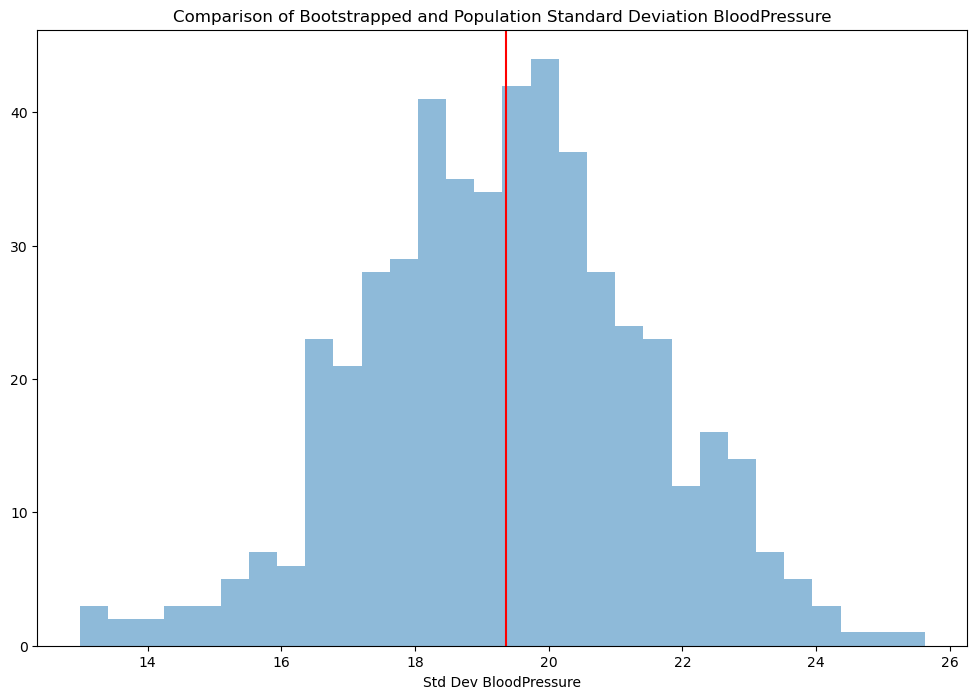

In [10]:
# Create a chart to compare bootstrapped and population standard deviation BloodPressure
plt.figure(figsize=(12, 8))
plt.hist(bootstrapped_std_devs, bins=30, alpha=0.5, label="Bootstrapped Std Devs")
plt.axvline(population_std_dev_blood_pressure, color="red", label="Population Std Dev")
plt.title("Comparison of Bootstrapped and Population Standard Deviation BloodPressure")
plt.xlabel("Std Dev BloodPressure")
plt


The bootstrapped distribution has a higher mean and a larger standard deviation than the other distribution, indicating a significant difference between the two.
The resampling technique of bootstrapping explains the differences in distributions. Repeatedly choosing the same values when resampling with replacement increases the likelihood of similarity.

